In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
sns.set(font='Arial')

In [80]:
df = pd.read_csv('..\\data\\pareto\\sales_act.csv',index_col=0)
df=df.join(pd.read_csv('..\\data\\pareto\\sales_sa.csv',index_col=0))
df=df.join(pd.read_csv('..\\data\\pareto\\new_list_act.csv',index_col=0))
df=df.join(pd.read_csv('..\\data\\pareto\\new_list_sa.csv',index_col=0))

df.index=df.index.rename('Date')
df.index=pd.DatetimeIndex(df.index,freq='QS-OCT')

In [81]:
df

,sales_act,sales_sa,new_list_act,new_list_sa
Date,,,,
1980-01-01,2886.0,NaN,4963.0,NaN
1980-04-01,2590.0,NaN,5462.0,NaN
1980-07-01,3298.0,NaN,5386.0,NaN
1980-10-01,2825.0,NaN,3933.0,NaN
1981-01-01,3296.0,NaN,5984.0,NaN
...,...,...,...,...
2020-10-01,5995.0,7288.0,6966.0,11045.0
2021-01-01,8027.0,8853.0,12444.0,12440.0
2021-04-01,12341.0,9712.0,17387.0,13542.0


<AxesSubplot:title={'center':'New Listings'}, xlabel='Date'>

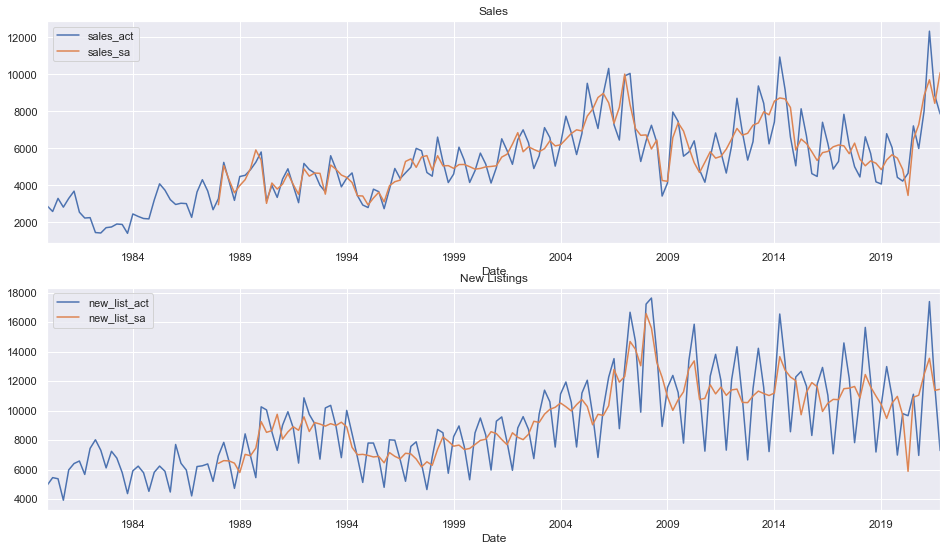

In [82]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(16,9))

df[['sales_act','sales_sa']].plot(ax=ax[0],title='Sales')
df[['new_list_act','new_list_sa']].plot(ax=ax[1],title='New Listings')


In [26]:
real_income = pd.read_excel('../data/BaselineProvincialForecasts.xlsx',sheet_name='RealDisposableIncome',engine='openpyxl',index_col=0)[['AB']]
real_income.rename({'AB':'RealDisposableIncome'},axis=1,inplace=True)

real_gdp = pd.read_excel('../data/BaselineProvincialForecasts.xlsx',sheet_name='RealGDP',engine='openpyxl',index_col=0)[['AB']]
real_gdp.rename({'AB':'RealGDP'},axis=1,inplace=True)

unemp = pd.read_excel('../data/BaselineProvincialForecasts.xlsx',sheet_name='Unemployment',engine='openpyxl',index_col=0)[['AB']]
unemp.rename({'AB':'Unemployment'},axis=1,inplace=True)

employment = pd.read_excel('../data/BaselineProvincialForecasts.xlsx',sheet_name='Employment',engine='openpyxl',index_col=0)[['AB']]
employment.rename({'AB':'Employment'},axis=1,inplace=True)

cpi = pd.read_excel('../data/BaselineProvincialForecasts.xlsx',sheet_name='CPI',engine='openpyxl',index_col=0,header=1)[['AB']]
cpi.rename({'AB':'CPI'},axis=1,inplace=True)

prov_econ=real_gdp.join(real_income)
prov_econ=prov_econ.join(unemp)
prov_econ=prov_econ.join(employment)
prov_econ=prov_econ.join(cpi)
prov_econ.index=prov_econ.index.rename('Date')
prov_econ.index=pd.PeriodIndex(prov_econ.index,freq='Q').to_timestamp()


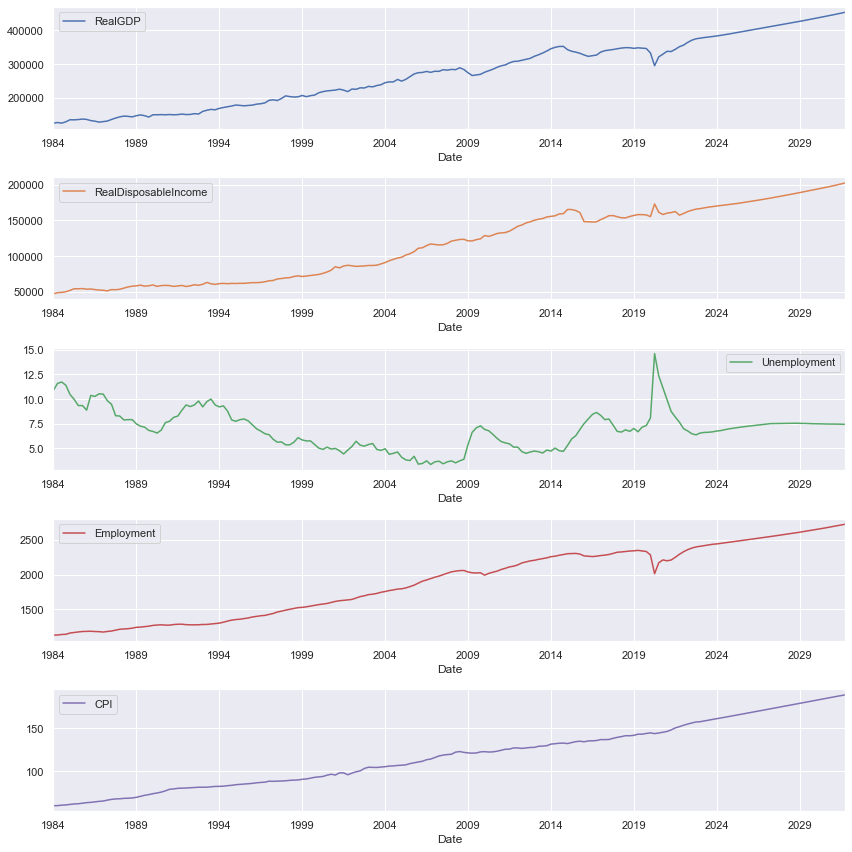

In [27]:

fig, ax = plt.subplots(nrows=5,ncols=1,figsize=(12,12))
prov_econ.plot(ax=ax,subplots=True)
plt.tight_layout()

In [28]:
prov_econ

,RealGDP,RealDisposableIncome,Unemployment,Employment,CPI
Date,,,,,
1984-01-01,124537.696000,47427.905649,10.900000,1131.646718,59.343473
1984-04-01,126432.684000,49015.069966,11.600000,1132.964409,59.518123
1984-07-01,124688.800000,49448.102005,11.733333,1140.598043,60.048126
1984-10-01,128648.819000,50330.216996,11.400000,1143.396344,60.322322
1985-01-01,134650.900000,52204.214947,10.466667,1161.538977,60.899252
...,...,...,...,...,...
2030-10-01,443518.991283,196865.076648,7.449761,2681.132009,185.766696
2031-01-01,446062.788990,198131.541324,7.450970,2691.908079,186.652715
2031-04-01,448636.526604,199487.861585,7.444424,2702.917741,187.527261


In [29]:
nat_econ=pd.read_excel('../data/BaselineNationalForecasts.xlsx',header=1,index_col=0,engine='openpyxl',sheet_name='Quarterly')[3:-11]
energy = pd.read_excel('../data/BaselineNationalForecasts.xlsx',sheet_name='Energy',header=0,index_col=0,engine='openpyxl')
covid = pd.read_excel('../data/BaselineNationalForecasts.xlsx',sheet_name='COVID',header=0,index_col=0,engine='openpyxl')

In [30]:
nat_econ.index = nat_econ.index.str.replace(' ','')
nat_econ.index=nat_econ.index.rename('Date')
nat_econ.index=pd.PeriodIndex(nat_econ.index,freq='Q').to_timestamp()
energy.index = energy.index.str.replace(' ','')
energy.index=energy.index.rename('Date')
energy.index=pd.PeriodIndex(energy.index,freq='Q').to_timestamp()
covid.index = covid.index.str.replace(' ','')
covid.index=covid.index.rename('Date')
covid.index=pd.PeriodIndex(covid.index,freq='Q').to_timestamp()


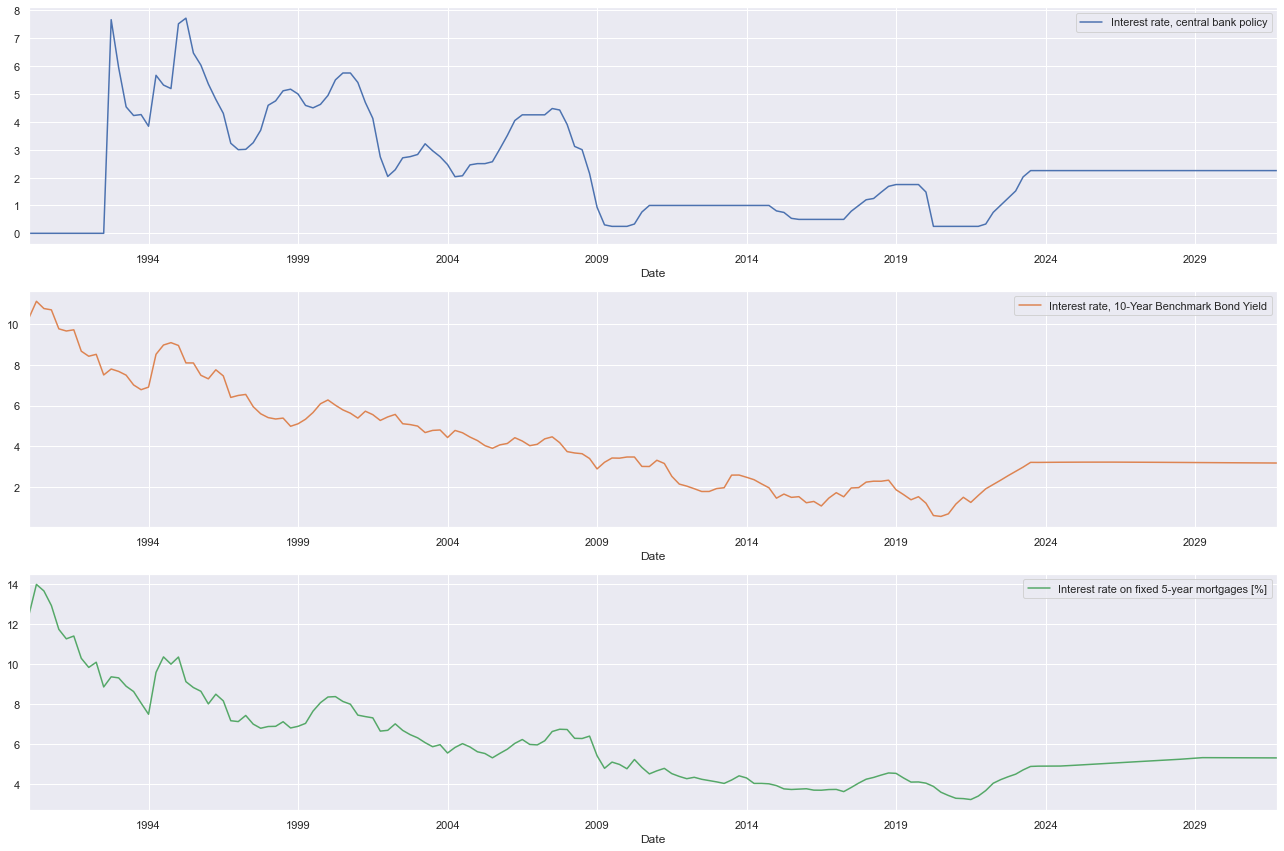

In [31]:

fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(18,12))
nat_econ['1990':][['Interest rate, central bank policy','Interest rate, 10-Year Benchmark Bond Yield','Interest rate on fixed 5-year mortgages [%]']].plot(ax=ax,subplots=True)
plt.tight_layout()

In [32]:
nat_econ['2019':'2024']

,"GDP, real, LCU",Unemployment rate,Consumer price index,"Employment, total","Income, personal disposable, real, LCU","Interest rate, central bank policy","Interest rate, 10-Year Benchmark Bond Yield",Interest rate on fixed 5-year mortgages [%],"Corporate borrowing rate, period average","World oil price, Brent crude spot, $pb",World Price Oil (West Texas Intermediate),"World oil price, Western Canada Select (WCS) crude, $pb"
Date,,,,,,,,,,,,
2019-01-01,520092.8,5.766667,134.7333,18926.47,293684.8,1.75,1.857742,4.516667,3.693846,63.17,54.85,44.1
2019-04-01,525653.3,5.566667,135.8333,19047.7,296698.9,1.75,1.620317,4.286667,3.537692,68.92333,59.78667,47.44
2019-07-01,528029.8,5.633333,136.3667,19102,299153.1,1.75,1.365238,4.08,3.473846,61.93,56.40667,43.81
2019-10-01,528528.3,5.7,136.9333,19124.47,301721.4,1.75,1.515645,4.086667,3.530769,63.41,56.91333,37.86
2020-01-01,518632,6.3,137.1,18842.4,304934.1,1.480769,1.197619,4.026667,3.381538,50.44,45.84,29.08
2020-04-01,459951,13,135.9667,16695.6,341020.3,0.25,0.59,3.863333,2.723077,29.34333,27.82667,19.74
2020-07-01,500771,10.03333,136.9667,18135.83,328187,0.25,0.545714,3.573333,2.394615,42.96333,40.88667,31.212
2020-10-01,508326.3,8.666667,137.9333,18574.03,321462.4,0.25,0.673871,3.41,2.296154,44.29,42.50667,31.51
2021-01-01,505411.1,9.231546,138.4327,18451.79,321299.8,0.25,1.151935,3.27,2.282073,51.16195,48.56377,32.05221


<AxesSubplot:xlabel='Date'>

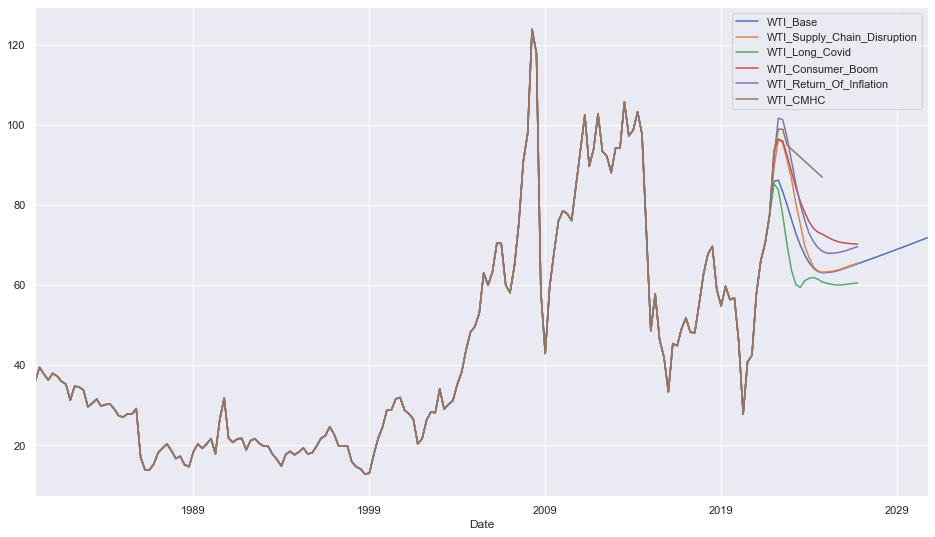

In [33]:
energy.plot(figsize=(16,9))

In [34]:
energy['2019':'2024']

,WTI_Base,WTI_Supply_Chain_Disruption,WTI_Long_Covid,WTI_Consumer_Boom,WTI_Return_Of_Inflation,WTI_CMHC
Date,,,,,,
2019-01-01,54.85000,54.85000,54.85000,54.85000,54.85000,54.85000
2019-04-01,59.78667,59.78667,59.78667,59.78667,59.78667,59.78667
2019-07-01,56.40667,56.40667,56.40667,56.40667,56.40667,56.40667
2019-10-01,56.91333,56.91333,56.91333,56.91333,56.91333,56.91333
2020-01-01,45.84000,45.84000,45.84000,45.84000,45.84000,45.84000
2020-04-01,27.82667,27.82667,27.82667,27.82667,27.82667,27.82667
2020-07-01,40.88667,40.88667,40.88667,40.88667,40.88667,40.88667
2020-10-01,42.50667,42.50667,42.50667,42.50667,42.50667,42.50667
2021-01-01,57.82333,57.82333,57.82333,57.82333,57.82333,57.82333


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


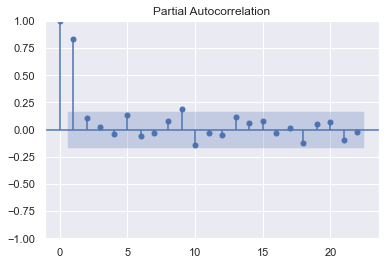

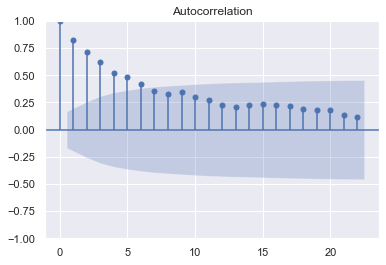

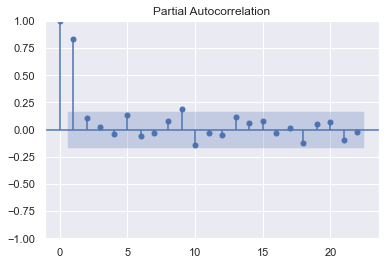

In [35]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df['sales_sa']['1988':])
plot_pacf(df['sales_sa']['1988':])

C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


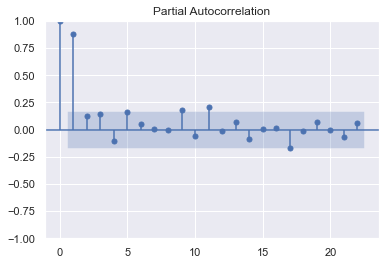

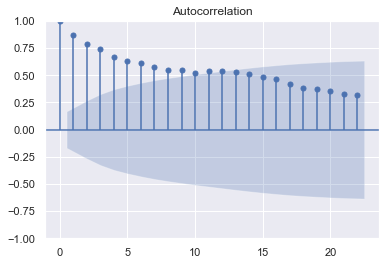

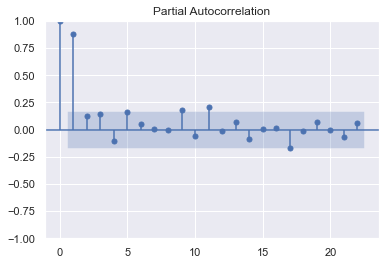

In [36]:
plot_acf(df['new_list_sa']['1988':])
plot_pacf(df['new_list_sa']['1988':])


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

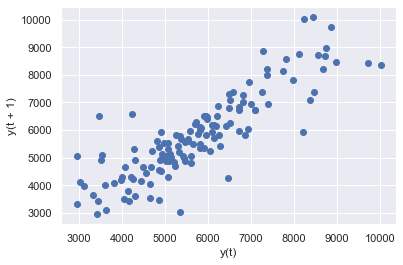

In [37]:
pd.plotting.lag_plot(df['sales_sa']['1988':])

In [38]:
df_diff = df.diff()
df_diff=df_diff.dropna()

In [39]:
df_diff

,sales_act,sales_sa,new_list_act,new_list_sa
Date,,,,
1988-04-01,1963.0,2111.0,908.0,186.0
1988-07-01,-1035.0,-766.0,-1303.0,-21.0
1988-10-01,-1019.0,-701.0,-1813.0,-151.0
1989-01-01,1291.0,392.0,1684.0,-635.0
1989-04-01,64.0,318.0,2008.0,1230.0
...,...,...,...,...
2020-10-01,-1224.0,799.0,-4143.0,138.0
2021-01-01,2032.0,1565.0,5478.0,1395.0
2021-04-01,4314.0,859.0,4943.0,1102.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

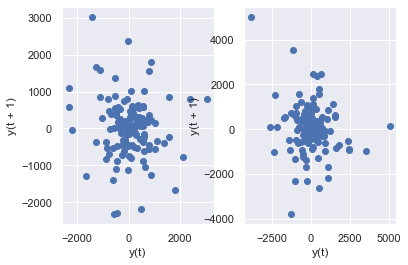

In [40]:
fig, ax =plt.subplots(nrows=1,ncols=2)
pd.plotting.lag_plot(df_diff['sales_sa']['1988':],ax=ax[0])
pd.plotting.lag_plot(df_diff['new_list_sa']['1988':],ax=ax[1])

C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


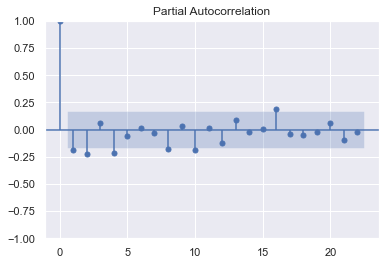

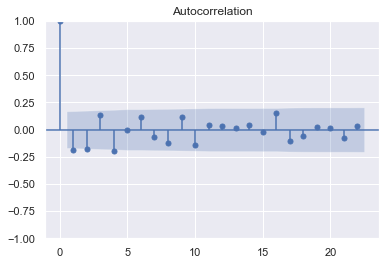

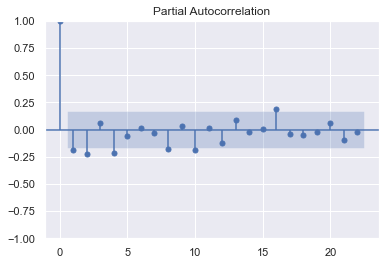

In [41]:
plot_acf(df_diff['new_list_sa']['1988':])
plot_pacf(df_diff['new_list_sa']['1988':])

C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


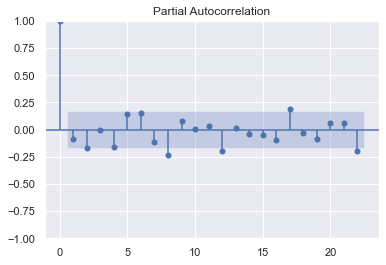

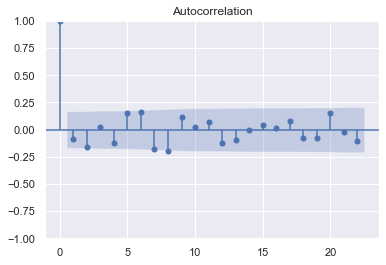

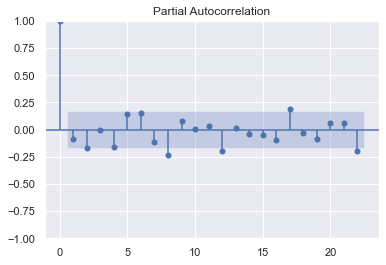

In [42]:
plot_acf(df_diff['sales_sa']['1988':])
plot_pacf(df_diff['sales_sa']['1988':])

In [43]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'mean error':me, 'mae': mae, 
            'mean percentage error': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax})

In [44]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df[['sales_sa']],order=(3,0,3))
model_fit = model.fit()

print(model_fit.summary())

C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               sales_sa   No. Observations:                  168
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -1091.853
Date:                Sat, 19 Feb 2022   AIC                           2199.707
Time:                        11:53:22   BIC                           2224.698
Sample:                    01-01-1980   HQIC                          2209.850
                         - 10-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5775.7007    601.123      9.608      0.000    4597.520    6953.881
ar.L1          0.8280      0.142      5.840      0.000       0.550       1.106
ar.L2         -0.6652      0.121     -5.496      0.0

In [45]:
predict=model_fit.get_prediction()
predict_ci = predict.conf_int(alpha=0.2)

In [46]:
predict_ci

,lower sales_sa,upper sales_sa
1980-01-01,3539.369747,8012.031579
1980-04-01,3539.369747,8012.031579
1980-07-01,3539.369747,8012.031579
1980-10-01,3539.369747,8012.031579
1981-01-01,3539.369747,8012.031579
...,...,...
2020-10-01,5481.757897,7367.010972
2021-01-01,6928.224703,8813.396397
2021-04-01,7153.000629,9038.058284
2021-07-01,7830.225317,9715.233981


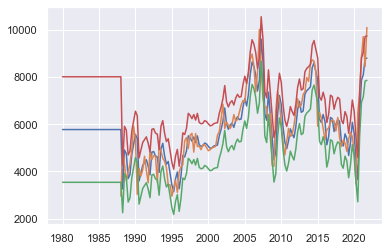

In [83]:
plt.plot(predict.predicted_mean)

plt.plot(df['sales_sa'])
plt.plot(predict_ci)



C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


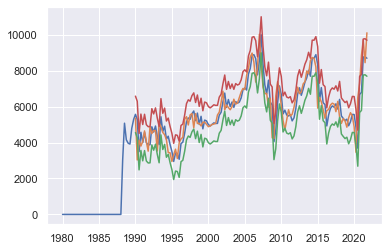

In [ ]:
model = ARIMA(df[['sales_sa']],order=(6,2,1))
model_fit = model.fit()

predict=model_fit.get_prediction()
predict_ci = predict.conf_int(alpha=0.2)
plt.plot(predict.predicted_mean)

plt.plot(df['sales_sa']['1990':])
plt.plot(predict_ci['1990':])


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=7084.896487, expected=6264.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=6202.117335, expected=5822.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=5956.732399, expected=5348.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=4969.089479, expected=5772.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=5924.742695, expected=5839.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=6154.529054, expected=6088.000000
predicted=6282.337789, expected=6187.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=6031.914443, expected=6139.000000
predicted=5830.471041, expected=5716.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=5524.472026, expected=6288.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=6384.523949, expected=5418.000000
predicted=5613.825944, expected=5062.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=5382.827686, expected=5326.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=5451.845069, expected=5200.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=5071.623088, expected=4853.000000
predicted=4752.909043, expected=5376.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=5462.214277, expected=5659.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=5672.036526, expected=5476.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=5435.173380, expected=4869.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=4992.833598, expected=3459.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=3852.857188, expected=6489.000000
predicted=6312.285019, expected=7288.000000
predicted=6591.556584, expected=8853.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=7913.662842, expected=9712.000000


C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=8784.858755, expected=8441.000000
predicted=7912.850833, expected=10102.000000
Test RMSE: 1039.855


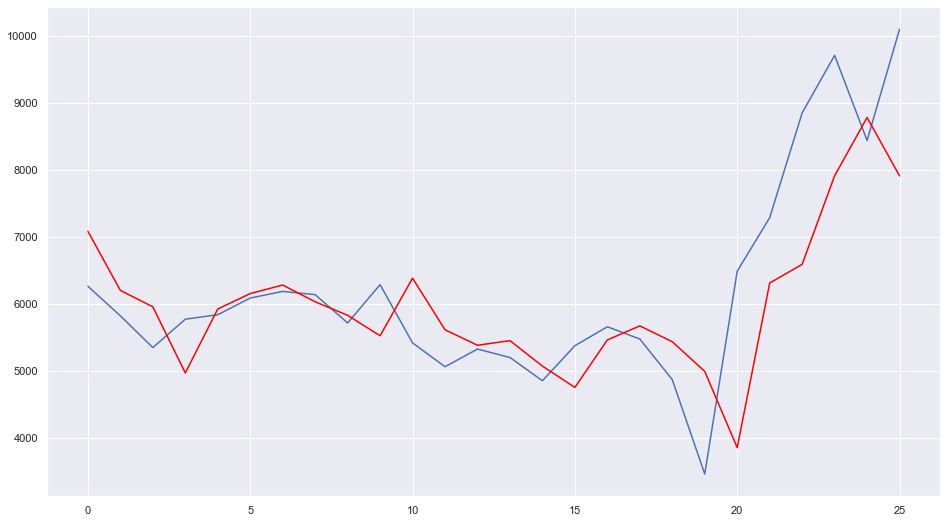

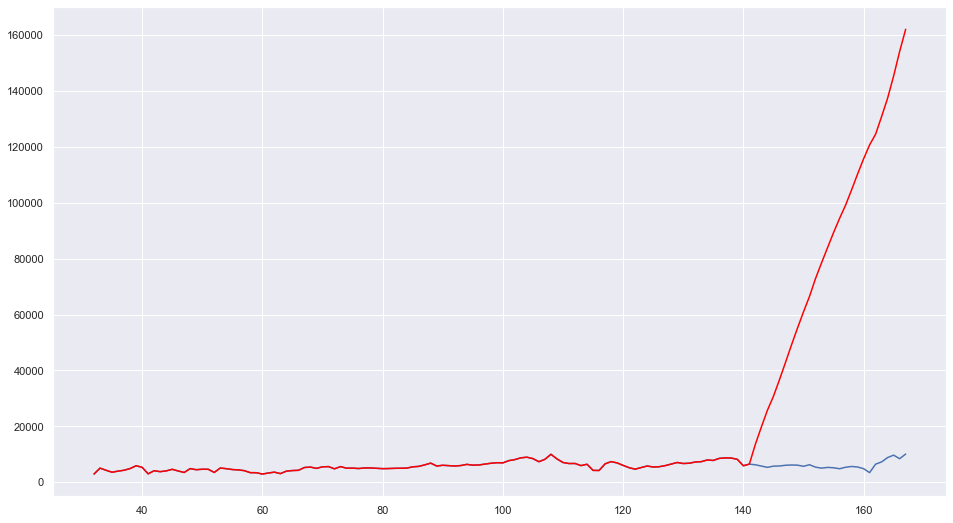

In [ ]:
val = df['sales_sa'].values
size = int(len(val)*0.85)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
predictions = list()

for i in range(len(test)):
    model = ARIMA(history,order=(3,0,3))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=output[0]
    predictions.append(yhat)
    obs=test[i]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat,obs))
rmse=math.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.3f' %rmse)

plt.figure(figsize=(16,9))
plt.plot(test,label='test')
plt.plot(predictions,label='predict',color='red')

history = df['sales_sa'][:size].values
for i in predictions:
    history=np.append(history,int(history[-1]+i))
    
plt.figure(figsize=(16,9))
plt.plot(df['sales_sa'].values,label='test')
plt.plot(history,label='predict',color='red')

In [48]:
val = df['sales_sa'].values
size = int(len(val)*0.85)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
predictions = list()

for i in range(len(test)):
    model = ARIMA(history,order=(6,2,1))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=output[0]
    predictions.append(yhat)
    obs=test[i]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat,obs))
rmse=math.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.3f' %rmse)

C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=7393.055422, expected=6264.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6305.637999, expected=5822.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6186.407973, expected=5348.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5050.398189, expected=5772.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5410.520002, expected=5839.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5913.232641, expected=6088.000000
predicted=6035.525526, expected=6187.000000
predicted=5976.552372, expected=6139.000000
predicted=6096.735885, expected=5716.000000
predicted=5887.854428, expected=6288.000000
predicted=6411.898641, expected=5418.000000
predicted=5485.226104, expected=5062.000000
predicted=5402.606304, expected=5326.000000
predicted=5321.152362, expected=5200.000000
predicted=5221.384069, expected=4853.000000
predicted=5029.399594, expected=5376.000000
predicted=5188.404611, expected=5659.000000
predicted=5493.675063, expected=5476.000000
predicted=5541.440083, expected=4869.000000
predicted=4905.988479, expected=3459.000000
predicted=3694.661732, expected=6489.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6647.076214, expected=7288.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6490.257808, expected=8853.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8433.034381, expected=9712.000000
predicted=8805.085352, expected=8441.000000
predicted=8309.905078, expected=10102.000000
Test RMSE: 1005.628


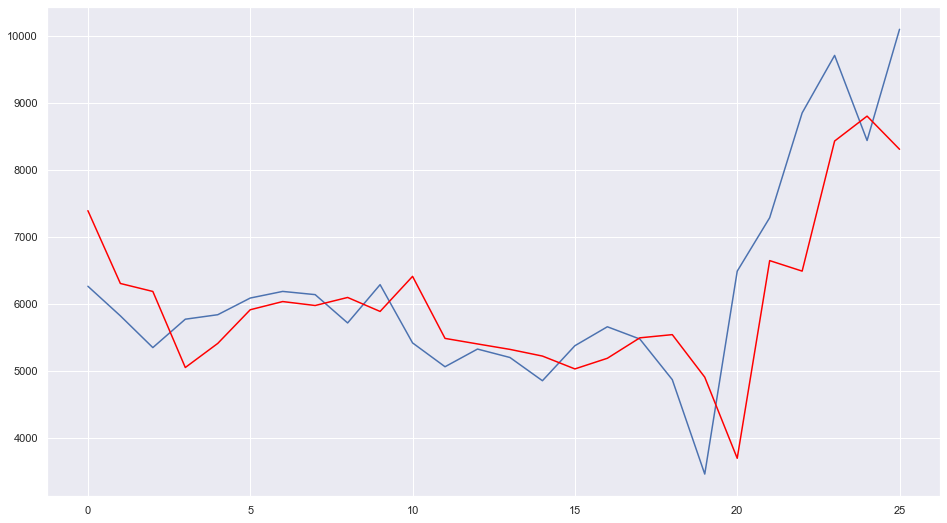

In [49]:
plt.figure(figsize=(16,9))
plt.plot(test,label='test')
plt.plot(predictions,label='predict',color='red')

In [61]:
val = df['sales_sa'].values
size = int(len(val)*0.85)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
predictions = list()

for i in range(len(test)):
    model = ARIMA(history,order=(1,1,8))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=output[0]
    predictions.append(yhat)
    obs=test[i]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat,obs))
rmse=math.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.3f' %rmse)

C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=7100.376060, expected=6264.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5865.770776, expected=5822.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6438.873909, expected=5348.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5367.275390, expected=5772.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5175.982463, expected=5839.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6586.859790, expected=6088.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6692.179523, expected=6187.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5599.415846, expected=6139.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6073.400497, expected=5716.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6321.254906, expected=6288.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6676.353323, expected=5418.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=4640.351080, expected=5062.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5309.216714, expected=5326.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5583.164889, expected=5200.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=5591.581250, expected=4853.000000
predicted=4695.445227, expected=5376.000000
predicted=5297.251953, expected=5659.000000
predicted=5850.147516, expected=5476.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6058.270823, expected=4869.000000
predicted=4475.228982, expected=3459.000000
predicted=3713.629993, expected=6489.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=6772.353262, expected=7288.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=7228.433273, expected=8853.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8183.517327, expected=9712.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=8689.151316, expected=8441.000000
predicted=8578.616877, expected=10102.000000
Test RMSE: 968.348


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


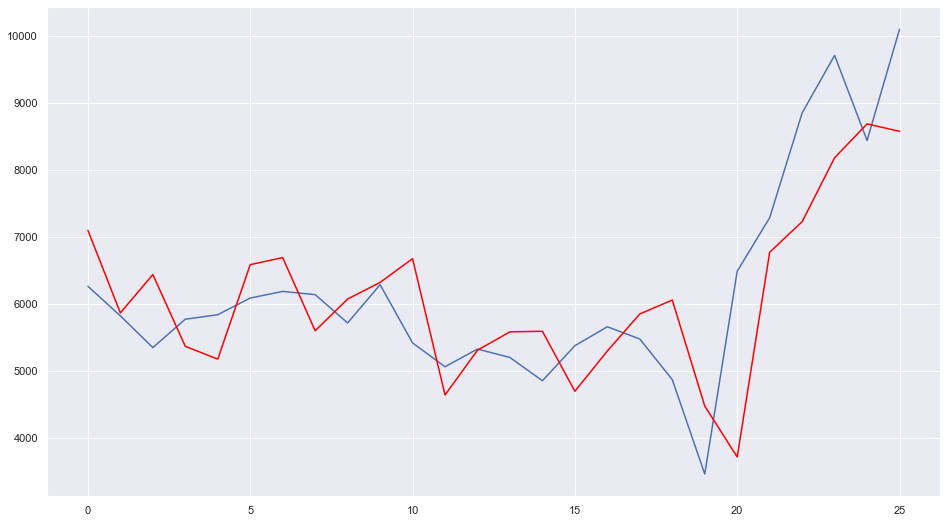

In [62]:
plt.figure(figsize=(16,9))
plt.plot(test,label='test')
plt.plot(predictions,label='predict',color='red')

In [102]:
val = df['sales_sa'].values
size = int(len(val)*0.85)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
predictions = list()

for i in range(len(test)):
    model = ARIMA(history,order=(1,0,8))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=output[0]
    predictions.append(yhat)
    obs=test[i]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat,obs))
rmse=math.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.3f' %rmse)

predicted=6743.661225, expected=6264.000000
predicted=6060.726285, expected=5822.000000
predicted=6123.612994, expected=5348.000000
predicted=4876.484894, expected=5772.000000
predicted=5362.133073, expected=5839.000000
predicted=6405.182833, expected=6088.000000
predicted=6642.851274, expected=6187.000000
predicted=5638.981726, expected=6139.000000
predicted=6203.226433, expected=5716.000000
predicted=6327.120725, expected=6288.000000
predicted=6489.016800, expected=5418.000000
predicted=4936.680168, expected=5062.000000
predicted=5149.639108, expected=5326.000000
predicted=5623.267765, expected=5200.000000
predicted=5378.711284, expected=4853.000000
predicted=4800.704606, expected=5376.000000
predicted=5216.174686, expected=5659.000000
predicted=5997.696712, expected=5476.000000
predicted=5827.420140, expected=4869.000000
predicted=4603.381870, expected=3459.000000
predicted=3517.042880, expected=6489.000000
predicted=7208.090964, expected=7288.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=7274.203966, expected=8853.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=7908.773373, expected=9712.000000
predicted=8429.381943, expected=8441.000000
predicted=8743.804456, expected=10102.000000
Test RMSE: 957.162


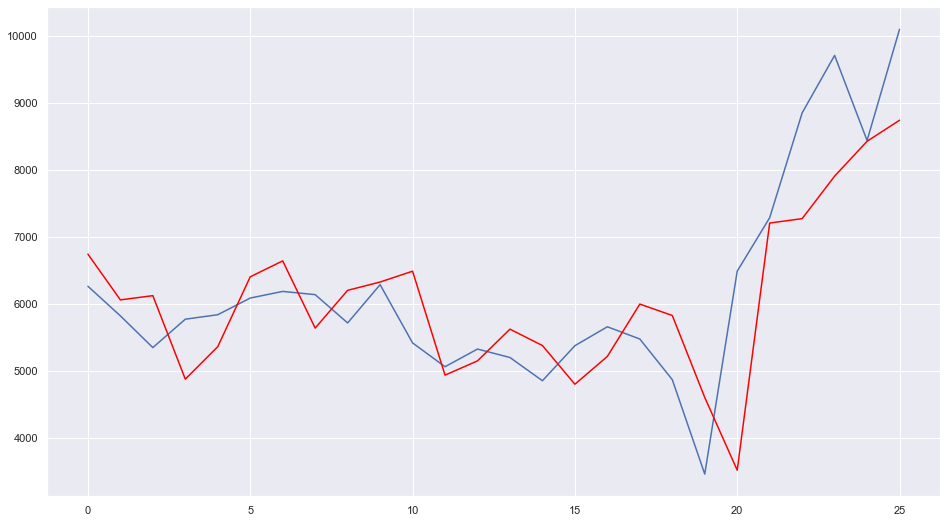

In [104]:
plt.figure(figsize=(16,9))
plt.plot(test,label='test')
plt.plot(predictions,label='predict',color='red')

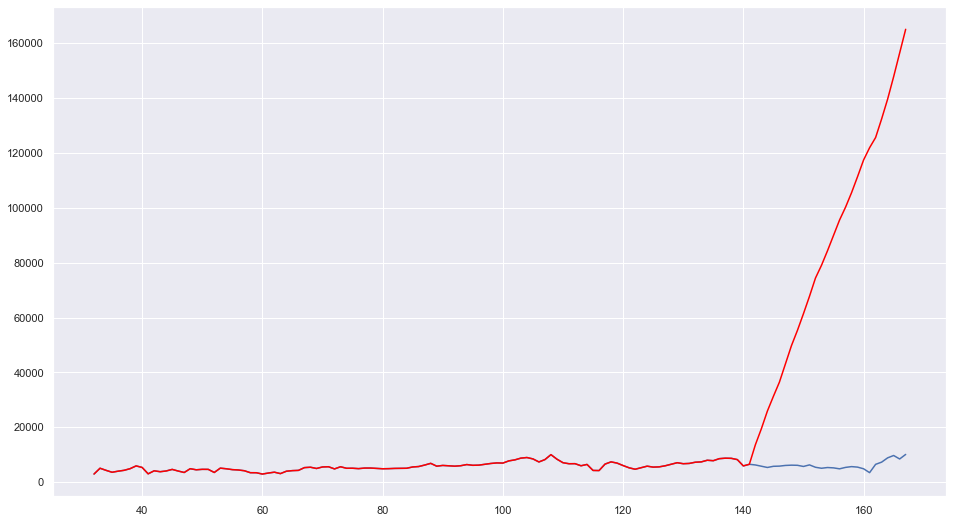

In [52]:
history = df['sales_sa'][:size].values
for i in predictions:
    history=np.append(history,int(history[-1]+i))
    
plt.figure(figsize=(16,9))
plt.plot(df['sales_sa'].values,label='test')
plt.plot(history,label='predict',color='red')

In [63]:
val = df['sales_sa'].values
size = int(len(val)*0.90)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
predictions = list()
model = ARIMA(history,order=(3,0,3))
model_fit=model.fit()
output=model_fit.get_forecast(len(test))
out_fcast=output.summary_frame(alpha=0.3)
rmse=math.sqrt(mean_squared_error(test,out_fcast['mean']))
print('RMSE: %.3f' % rmse)


RMSE: 1946.331


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [64]:
val = df['sales_sa'].values
size = int(len(val)*0.90)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
predictions = list()
model = ARIMA(history,order=(6,2,1))
model_fit=model.fit()
output=model_fit.get_forecast(len(test))
out_fcast=output.summary_frame(alpha=0.3)
rmse=math.sqrt(mean_squared_error(test,out_fcast['mean']))
print('RMSE: %.3f' % rmse)

RMSE: 1709.889


In [65]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

model = AutoReg(df[['sales_sa']].dropna(),3,old_names=False)
model_fit = model.fit()

print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:               sales_sa   No. Observations:                  136
Model:                     AutoReg(3)   Log Likelihood               -1069.763
Method:               Conditional MLE   S.D. of innovations            753.248
Date:                Sat, 19 Feb 2022   AIC                           2149.526
Time:                        11:58:39   BIC                           2163.978
Sample:                    10-01-1988   HQIC                          2155.399
                         - 10-01-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         551.5841    281.035      1.963      0.050       0.766    1102.403
sales_sa.L1     0.8827      0.088     10.059      0.000       0.711       1.055
sales_sa.L2    -0.0965      0.116     -0.832    

C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [66]:
sel = ar_select_order(df[['sales_sa']].dropna(),12,old_names=False)
sel.ar_lags
res=sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               sales_sa   No. Observations:                  136
Model:                     AutoReg(1)   Log Likelihood               -1089.194
Method:               Conditional MLE   S.D. of innovations            772.142
Date:                Sat, 19 Feb 2022   AIC                           2184.389
Time:                        11:58:45   BIC                           2193.105
Sample:                    04-01-1988   HQIC                          2187.931
                         - 10-01-2021                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         756.4188    263.379      2.872      0.004     240.206    1272.632
sales_sa.L1     0.8775      0.044     19.776      0.000       0.791       0.964
                                    Roots       

C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


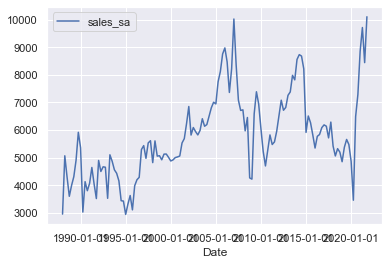

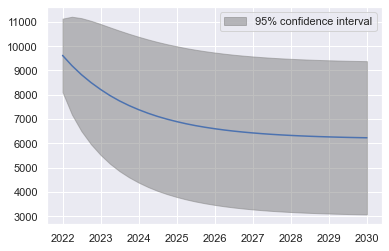

In [67]:
fig, df[['sales_sa']].plot()
fig = res.plot_predict(136,168)



### SARIMAX

In [84]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [109]:
test_df = nat_econ.join(energy).join(df).join(prov_econ).join(covid)
history_df=test_df['1988':'2021']


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE: 1305.065


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


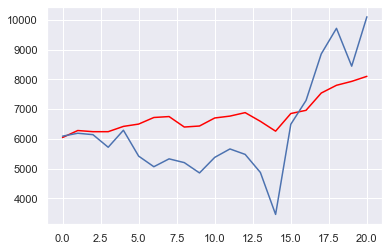

In [110]:
val = np.array(history_df[['sales_sa']].values,dtype=float)
size = int(len(val)*0.85)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
exog = np.array(history_df[['WTI_Base','Interest rate on fixed 5-year mortgages [%]','COVID-19']].values,dtype=float)
exog_train, exog_test = exog[0:size], exog[size:len(exog)]
exog_train = np.array(exog_train, dtype=float)
predictions = list()
model = SARIMAX(history,order=(5,1,3), seasonal_order=(0,0,0,0),exog=exog_train)
model_fit=model.fit()
output=model_fit.get_forecast(len(test), exog=exog_test)
rmse=math.sqrt(mean_squared_error(test,output.summary_frame()['mean']))
print('RMSE: %.3f' % rmse)
plt.plot(output.summary_frame()['mean'],color='red')
plt.plot(test)

In [111]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  115
Model:               SARIMAX(5, 1, 3)   Log Likelihood                -896.788
Date:                Sat, 19 Feb 2022   AIC                           1817.576
Time:                        12:12:05   BIC                           1850.411
Sample:                             0   HQIC                          1830.902
                                - 115                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            27.1779      5.410      5.023      0.000      16.574      37.782
x2          -585.3678    151.904     -3.854      0.000    -883.093    -287.642
const               0   1.62e+05          0      1.000   -3.18e+05    3.18e+05
ar.L1         -0.3356      0.096     -3.502      0.000      -0.523      -0.148
ar.L2          0.1378      0.135      1.017      0.309      -0.128       0.403
ar.L3          0.8595      0.122      7.020      0.000       0.620       1.099
ar.L4          0.0262      0.092      0.284      0.777      -0.155       0.207
ar.L5          0.0790      0.113      0.697      0.486      -0.143       0.301
ma.L1          0.3318      0.637      0.521      0.603      -0.917       1.580
ma.L2         -0.3409      0.859     -0.397      0.691      -2.024       1.342
ma.L3         -0.9857      0.703     -1.402      0.161      -2.363       0.392
sigma2      3.519e+05   2.16e+05      1.630      0.103   -7.12e+04    7.75e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.24   Jarque-Bera (JB):                 5.39
Prob(Q):                              0.27   Prob(JB):                         0.07
Heteroskedasticity (H):               1.08   Skew:                             0.13
Prob(H) (two-sided):                  0.82   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [112]:
forecast_accuracy(output.summary_frame()['mean'],np.ndarray.flatten(test))

C:\Users\makmi\AppData\Local\Temp\ipykernel_23080\2177725992.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
C:\Users\makmi\AppData\Local\Temp\ipykernel_23080\2177725992.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],


{'mape': 0.1934447703381317,
 'mean error': 493.34245345684116,
 'mae': 1075.8815130719368,
 'mean percentage error': 0.13088041596034433,
 'rmse': 1305.0648689913148,
 'corr': 0.8425209455011878,
 'minmax': 0.15104507864637806}

RMSE: 1830.562


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


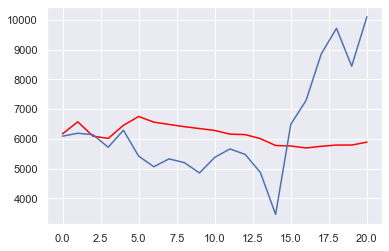

In [115]:
val = np.array(history_df[['sales_sa']].values,dtype=float)
size = int(len(val)*0.85)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
exog = np.array(history_df[['WTI_Base','Interest rate on fixed 5-year mortgages [%]','COVID-19']].values,dtype=float)
exog_train, exog_test = exog[0:size], exog[size:len(exog)]
exog_train = np.array(exog_train, dtype=float)
predictions = list()
model = SARIMAX(history,order=(1,0,8), seasonal_order=(0,0,0,0),exog=exog_train)
model_fit=model.fit()
output=model_fit.get_forecast(len(test), exog=exog_test)
rmse=math.sqrt(mean_squared_error(test,output.summary_frame()['mean']))
print('RMSE: %.3f' % rmse)
plt.plot(output.summary_frame()['mean'],color='red')
plt.plot(test)

In [116]:
forecast_accuracy(output.summary_frame()['mean'],np.ndarray.flatten(test))

C:\Users\makmi\AppData\Local\Temp\ipykernel_23080\2177725992.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
C:\Users\makmi\AppData\Local\Temp\ipykernel_23080\2177725992.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],


{'mape': 0.21703758125363162,
 'mean error': -149.48081917456992,
 'mae': 1399.9505288650096,
 'mean percentage error': 0.04317878123543549,
 'rmse': 1830.5615476873986,
 'corr': -0.4868464116473005,
 'minmax': 0.1867961042768469}

C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\makmi\AppData\Local\Temp\ipykernel_23080\1726607158.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history=history.append(fcast_res[['mean']])


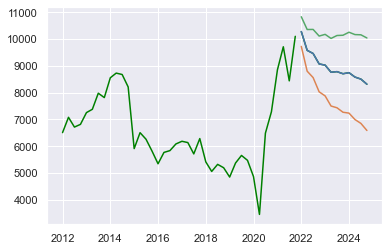

In [97]:

exog =  np.array(test_df[['WTI_Base','Interest rate on fixed 5-year mortgages [%]','COVID-19',]]['1988':'2021'].values,dtype=float)
exog_fcast = np.array(test_df[['WTI_Base','Interest rate on fixed 5-year mortgages [%]','COVID-19',]]['2022':'2024'].values,dtype=float)


model = SARIMAX(val,order=(5,1,3), seasonal_order=(0,0,0,0),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(12,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.4)
fcast_res.index= pd.date_range(start='2022',periods=12,freq='qs-oct')

history = test_df[['sales_sa']]['2012':]
history=history.append(fcast_res[['mean']])
#history.index = pd.date_range(start='2019',end='2025',freq='qs-oct')
plt.plot(history,color='green')

plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']]['2020':])

In [98]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  136
Model:               SARIMAX(5, 1, 3)   Log Likelihood               -1067.948
Date:                Sat, 19 Feb 2022   AIC                           2159.895
Time:                        12:06:35   BIC                           2194.759
Sample:                             0   HQIC                          2174.063
                                - 136                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            32.7580      6.002      5.458      0.000      20.995      44.521
x2          -614.9550    124.114     -4.955      0.000    -858.215    -371.695
x3          -623.2889    650.658     -0.958      0.338   -1898.554     651.977
ar.L1          0.5425      0.123      4.413      0.000       0.302       0.783
ar.L2          0.3760      0.110      3.404      0.001       0.160       0.593
ar.L3         -0.7473      0.143     -5.232      0.000      -1.027      -0.467
ar.L4         -0.0844      0.073     -1.161      0.246      -0.227       0.058
ar.L5         -0.0850      0.081     -1.050      0.294      -0.244       0.074
ma.L1         -0.5501      0.706     -0.779      0.436      -1.935       0.834
ma.L2         -0.5558      0.645     -0.862      0.389      -1.820       0.708
ma.L3          0.9943      0.142      7.012      0.000       0.716       1.272
sigma2      4.262e+05      0.001   5.53e+08      0.000    4.26e+05    4.26e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.13   Jarque-Bera (JB):                10.66
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             0.26
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.89e+28. Standard errors may be unstable.
"""

C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\makmi\AppData\Local\Temp\ipykernel_23080\1901271962.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history=history.append(fcast_res[['mean']])


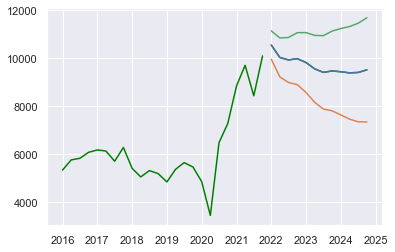

In [95]:

exog =  np.array(test_df[['WTI_Base','Interest rate on fixed 5-year mortgages [%]','COVID-19',]]['1988':'2021'].values,dtype=float)
exog_fcast = np.array(test_df[['WTI_Base','Interest rate on fixed 5-year mortgages [%]','COVID-19',]]['2022':'2024'].values,dtype=float)


model = SARIMAX(val,order=(3,1,1), seasonal_order=(0,1,1,4),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(12,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.4)
fcast_res.index= pd.date_range(start='2022',periods=12,freq='qs-oct')

history = test_df[['sales_sa']]['2016':]
history=history.append(fcast_res[['mean']])
#history.index = pd.date_range(start='2019',end='2025',freq='qs-oct')
plt.plot(history,color='green')

plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']]['2020':])

In [96]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  136
Model:             SARIMAX(3, 1, 1)x(0, 1, 1, 4)   Log Likelihood               -1054.876
Date:                           Sat, 19 Feb 2022   AIC                           2127.751
Time:                                   12:06:18   BIC                           2153.628
Sample:                                        0   HQIC                          2138.266
                                           - 136                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            35.3753      5.664      6.245      0.000      24.273      46.477
x2          -669.9933    103.338     -6.484      0.000    -872.532    -467.455
x3          -533.1841    478.176     -1.115      0.265   -1470.391     404.023
ar.L1          0.6338      0.300      2.116      0.034       0.047       1.221
ar.L2         -0.1110      0.084     -1.316      0.188      -0.276       0.054
ar.L3          0.2044      0.092      2.233      0.026       0.025       0.384
ma.L1         -0.6903      0.297     -2.326      0.020      -1.272      -0.109
ma.S.L4       -0.9493      0.069    -13.820      0.000      -1.084      -0.815
sigma2      4.914e+05   5.06e+04      9.706      0.000    3.92e+05    5.91e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 4.47
Prob(Q):                              0.67   Prob(JB):                         0.11
Heteroskedasticity (H):               0.84   Skew:                            -0.14
Prob(H) (two-sided):                  0.57   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [478]:
history[-12:]

,sales_sa,mean
2022-01-01,NaN,10414.731477
2022-04-01,NaN,9918.434116
2022-07-01,NaN,9807.779821
2022-10-01,NaN,9817.332109
2023-01-01,NaN,9640.340410
2023-04-01,NaN,9396.974933
2023-07-01,NaN,9246.558909
2023-10-01,NaN,9282.618149
2024-01-01,NaN,9234.736533
2024-04-01,NaN,9193.923277


In [480]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  136
Model:             SARIMAX(3, 1, 1)x(0, 1, 1, 4)   Log Likelihood               -1056.301
Date:                           Wed, 16 Feb 2022   AIC                           2130.602
Time:                                   22:26:09   BIC                           2156.479
Sample:                                        0   HQIC                          2141.117
                                           - 136                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            31.3016      4.474      6.996      0.000      22.532      40.071
x2          -651.1353     87.975     -7.401      0.000    -823.564    -478.707
x3          -533.4057    375.107     -1.422      0.155   -1268.602     201.790
ar.L1          0.6310      0.408      1.545      0.122      -0.169       1.431
ar.L2         -0.0979      0.078     -1.262      0.207      -0.250       0.054
ar.L3          0.1723      0.091      1.885      0.059      -0.007       0.352
ma.L1         -0.7163      0.409     -1.751      0.080      -1.518       0.086
ma.S.L4       -0.9508      0.059    -16.010      0.000      -1.067      -0.834
sigma2      3.968e+05   3.31e+04     11.987      0.000    3.32e+05    4.62e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 4.89
Prob(Q):                              0.82   Prob(JB):                         0.09
Heteroskedasticity (H):               0.90   Skew:                            -0.10
Prob(H) (two-sided):                  0.71   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [481]:
history[-12:]

,sales_sa,0
2022-01-01,NaN,10633.156905
2022-04-01,NaN,10317.369391
2022-07-01,NaN,10297.163776
2022-10-01,NaN,10285.683918
2023-01-01,NaN,10191.680172
2023-04-01,NaN,10026.065270
2023-07-01,NaN,9935.627421
2023-10-01,NaN,10014.871861
2024-01-01,NaN,9996.786515
2024-04-01,NaN,9967.827786


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\makmi\AppData\Local\Temp\ipykernel_23080\1620996409.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history=history.append(fcast_res[['mean']])


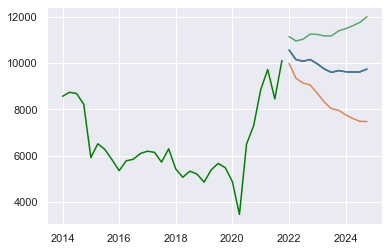

In [99]:

exog =  np.array(test_df[['WTI_Base','Interest rate on fixed 5-year mortgages [%]','COVID-19','Unemployment']]['1988':'2021'].values,dtype=float)
exog_fcast = np.array(test_df[['WTI_Base','Interest rate on fixed 5-year mortgages [%]','COVID-19','Unemployment']]['2022':'2024'].values,dtype=float)


model = SARIMAX(val,order=(3,1,1), seasonal_order=(0,1,1,4),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(12,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.4)
fcast_res.index= pd.date_range(start='2022',periods=12,freq='qs-oct')

history = test_df[['sales_sa']]['2014':]
history=history.append(fcast_res[['mean']])
#history.index = pd.date_range(start='2019',end='2025',freq='qs-oct')
plt.plot(history,color='green')

plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']]['2020':])

In [100]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  136
Model:             SARIMAX(3, 1, 1)x(0, 1, 1, 4)   Log Likelihood               -1054.456
Date:                           Sat, 19 Feb 2022   AIC                           2128.912
Time:                                   12:07:44   BIC                           2157.664
Sample:                                        0   HQIC                          2140.595
                                           - 136                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            31.4509      6.035      5.212      0.000      19.623      43.279
x2          -684.4883     99.170     -6.902      0.000    -878.857    -490.119
x3          -424.6291    542.291     -0.783      0.434   -1487.500     638.242
x4          -124.0473     84.456     -1.469      0.142    -289.577      41.483
ar.L1          0.6471      0.282      2.291      0.022       0.093       1.201
ar.L2         -0.0909      0.085     -1.067      0.286      -0.258       0.076
ar.L3          0.1782      0.086      2.084      0.037       0.011       0.346
ma.L1         -0.6802      0.280     -2.432      0.015      -1.228      -0.132
ma.S.L4       -0.9370      0.065    -14.369      0.000      -1.065      -0.809
sigma2       4.74e+05   4.93e+04      9.622      0.000    3.77e+05    5.71e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 5.33
Prob(Q):                              0.65   Prob(JB):                         0.07
Heteroskedasticity (H):               0.70   Skew:                            -0.21
Prob(H) (two-sided):                  0.24   Kurtosis:                         3.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\makmi\AppData\Local\Temp\ipykernel_23080\3000130098.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history=history.append(fcast_res[['mean']])


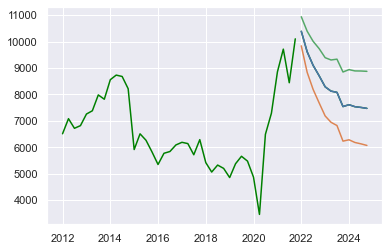

In [101]:

exog =  np.array(test_df[['WTI_Base','Interest rate on fixed 5-year mortgages [%]','COVID-19','Unemployment']]['1988':'2021'].values,dtype=float)
exog_fcast = np.array(test_df[['WTI_Base','Interest rate on fixed 5-year mortgages [%]','COVID-19','Unemployment']]['2022':'2024'].values,dtype=float)


model = SARIMAX(val,order=(1,1,8), seasonal_order=(0,0,0,0),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(12,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.4)
fcast_res.index= pd.date_range(start='2022',periods=12,freq='qs-oct')

history = test_df[['sales_sa']]['2012':]
history=history.append(fcast_res[['mean']])
#history.index = pd.date_range(start='2019',end='2025',freq='qs-oct')
plt.plot(history,color='green')

plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']]['2020':])

C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\makmi\AppData\Local\Temp\ipykernel_23080\899634776.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history=history.append(fcast_res[['mean']])


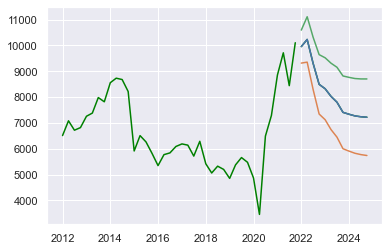

In [117]:

exog =  np.array(test_df[['WTI_Base','Interest rate on fixed 5-year mortgages [%]','COVID-19','Unemployment']]['1988':'2021'].values,dtype=float)
exog_fcast = np.array(test_df[['WTI_Base','Interest rate on fixed 5-year mortgages [%]','COVID-19','Unemployment']]['2022':'2024'].values,dtype=float)


model = SARIMAX(val,order=(1,0,8), seasonal_order=(0,0,0,0),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(12,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.4)
fcast_res.index= pd.date_range(start='2022',periods=12,freq='qs-oct')

history = test_df[['sales_sa']]['2012':]
history=history.append(fcast_res[['mean']])
#history.index = pd.date_range(start='2019',end='2025',freq='qs-oct')
plt.plot(history,color='green')

plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']]['2020':])

C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\makmi\AppData\Local\Temp\ipykernel_23080\1209641561.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history=history.append(fcast_res[['mean']])


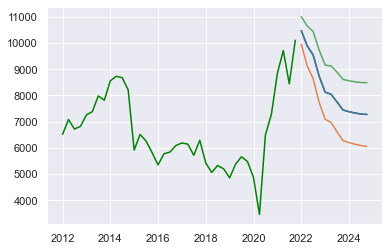

In [149]:

exog =  np.array(test_df[['WTI_Base','Interest rate on fixed 5-year mortgages [%]','COVID-19']]['1988':'2021'].values,dtype=float)
exog_fcast = np.array(test_df[['WTI_Base','Interest rate on fixed 5-year mortgages [%]','COVID-19']]['2022':'2024'].values,dtype=float)


model = SARIMAX(val,order=(1,0,8), seasonal_order=(0,0,0,0),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(12,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.5)
fcast_res.index= pd.date_range(start='2022',periods=12,freq='qs-oct')

history = test_df[['sales_sa']]['2012':]
history=history.append(fcast_res[['mean']])
#history.index = pd.date_range(start='2019',end='2025',freq='qs-oct')
plt.plot(history,color='green')

plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']]['2020':])

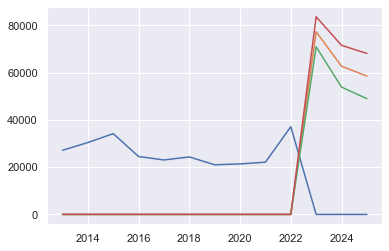

In [141]:
plt.plot(history[['sales_sa']].join(fcast_res[['mean','mean_ci_lower','mean_ci_upper']])[:'2024'].resample('A').sum())

In [142]:
history[['sales_sa']].join(fcast_res[['mean','mean_ci_lower','mean_ci_upper']])[:'2024'].resample('A').mean()

,sales_sa,mean,mean_ci_lower,mean_ci_upper
2012-12-31,6781.50,NaN,NaN,NaN
2013-12-31,7608.50,NaN,NaN,NaN
2014-12-31,8544.50,NaN,NaN,NaN
2015-12-31,6127.00,NaN,NaN,NaN
2016-12-31,5761.75,NaN,NaN,NaN
2017-12-31,6082.50,NaN,NaN,NaN
2018-12-31,5251.50,NaN,NaN,NaN
2019-12-31,5341.00,NaN,NaN,NaN
2020-12-31,5526.25,NaN,NaN,NaN
2021-12-31,9277.00,NaN,NaN,NaN


In [150]:
history[['sales_sa']].join(fcast_res[['mean','mean_ci_lower','mean_ci_upper']])['2019':'2024'].drop_duplicates().to_csv('sales_fcast_base_oil.csv')

In [132]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  136
Model:               SARIMAX(1, 0, 8)   Log Likelihood               -1098.815
Date:                Sat, 19 Feb 2022   AIC                           2223.629
Time:                        12:22:05   BIC                           2261.494
Sample:                             0   HQIC                          2239.016
                                - 136                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            24.3644      9.619      2.533      0.011       5.511      43.218
x2           330.0726    139.784      2.361      0.018      56.102     604.044
x3          1537.2503    365.265      4.209      0.000     821.345    2253.156
ar.L1          0.9958      0.012     85.522      0.000       0.973       1.019
ma.L1          0.0518      0.095      0.544      0.586      -0.135       0.238
ma.L2         -0.1365      0.095     -1.432      0.152      -0.323       0.050
ma.L3         -0.0736      0.099     -0.745      0.456      -0.267       0.120
ma.L4         -0.3111      0.118     -2.648      0.008      -0.541      -0.081
ma.L5          0.0632      0.098      0.647      0.517      -0.128       0.255
ma.L6          0.1246      0.136      0.914      0.361      -0.143       0.392
ma.L7         -0.1901      0.089     -2.138      0.032      -0.364      -0.016
ma.L8         -0.1900      0.116     -1.643      0.100      -0.417       0.037
sigma2      6.066e+05   8.18e+04      7.413      0.000    4.46e+05    7.67e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                28.10
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                            -0.19
Prob(H) (two-sided):                  0.65   Kurtosis:                         5.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [133]:
history.resample('A').sum()

,sales_sa,mean
2012-12-31,27126.0,0.000000
2013-12-31,30434.0,0.000000
2014-12-31,34178.0,0.000000
2015-12-31,24508.0,0.000000
2016-12-31,23047.0,0.000000
2017-12-31,24330.0,0.000000
2018-12-31,21006.0,0.000000
2019-12-31,21364.0,0.000000
2020-12-31,22105.0,0.000000
2021-12-31,37108.0,0.000000


C:\Users\makmi\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\makmi\AppData\Local\Temp\ipykernel_23080\2517269502.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history=history.append(fcast_res[['mean']])


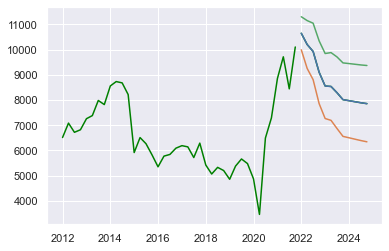

In [147]:

exog =  np.array(test_df[['WTI_CMHC','Interest rate on fixed 5-year mortgages [%]','COVID-19']]['1988':'2021'].values,dtype=float)
exog_fcast = np.array(test_df[['WTI_CMHC','Interest rate on fixed 5-year mortgages [%]','COVID-19']]['2022':'2024'].values,dtype=float)


model = SARIMAX(val,order=(1,0,8), seasonal_order=(0,0,0,0),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(12,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.4)
fcast_res.index= pd.date_range(start='2022',periods=12,freq='qs-oct')

history = test_df[['sales_sa']]['2012':]
history=history.append(fcast_res[['mean']])
#history.index = pd.date_range(start='2019',end='2025',freq='qs-oct')
plt.plot(history,color='green')

plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']]['2020':])

In [125]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  136
Model:               SARIMAX(1, 0, 8)   Log Likelihood               -1098.815
Date:                Sat, 19 Feb 2022   AIC                           2223.629
Time:                        12:15:39   BIC                           2261.494
Sample:                             0   HQIC                          2239.016
                                - 136                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            24.3644      9.619      2.533      0.011       5.511      43.218
x2           330.0726    139.784      2.361      0.018      56.102     604.044
x3          1537.2503    365.265      4.209      0.000     821.345    2253.156
ar.L1          0.9958      0.012     85.522      0.000       0.973       1.019
ma.L1          0.0518      0.095      0.544      0.586      -0.135       0.238
ma.L2         -0.1365      0.095     -1.432      0.152      -0.323       0.050
ma.L3         -0.0736      0.099     -0.745      0.456      -0.267       0.120
ma.L4         -0.3111      0.118     -2.648      0.008      -0.541      -0.081
ma.L5          0.0632      0.098      0.647      0.517      -0.128       0.255
ma.L6          0.1246      0.136      0.914      0.361      -0.143       0.392
ma.L7         -0.1901      0.089     -2.138      0.032      -0.364      -0.016
ma.L8         -0.1900      0.116     -1.643      0.100      -0.417       0.037
sigma2      6.066e+05   8.18e+04      7.413      0.000    4.46e+05    7.67e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                28.10
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                            -0.19
Prob(H) (two-sided):                  0.65   Kurtosis:                         5.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [148]:
history[['sales_sa']].join(fcast_res[['mean','mean_ci_lower','mean_ci_upper']])['2019':'2024'].drop_duplicates().to_csv('sales_fcast_cmhc_oil.csv')

In [128]:
fcast_res.resample('A').sum()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
2022-12-31,39871.614362,4716.823649,35901.835425,43841.393300
2023-12-31,33390.432261,6548.413111,27879.148740,38901.715781
2024-12-31,31645.933934,7095.843558,25673.921326,37617.946542


In [130]:
history.resample('A').sum()

,sales_sa,mean
2012-12-31,27126.0,0.000000
2013-12-31,30434.0,0.000000
2014-12-31,34178.0,0.000000
2015-12-31,24508.0,0.000000
2016-12-31,23047.0,0.000000
2017-12-31,24330.0,0.000000
2018-12-31,21006.0,0.000000
2019-12-31,21364.0,0.000000
2020-12-31,22105.0,0.000000
2021-12-31,37108.0,0.000000


In [3]:
from statsmodels.tsa.api import ARDL
from statsmodels.tsa.ardl import ardl_select_order

In [2]:
tsa.ardl

AttributeError: module 'statsmodels.tsa.api' has no attribute 'ardl'

In [1]:
import statsmodels

In [2]:
statsmodels.__version__

'0.13.2'